# Implementing K-nearest Neighbour on Breast Cancer Dataset

Using the [Breast Cancer Wisconsin (Diagnostic) Data Set from Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data), we will try to predict whether the cancer is benign or malignant by implementing K-nearest neighbour for classification.

"malignant" refers to cancerous tumors that can invade nearby tissues and spread to other parts of the body, potentially causing harm.

"benign" refers to non-cancerous tumors that do not spread to other parts of the body and are typically less harmful.

## Importing libraries and checking out the dataset.

We will start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


It looks like that there is no missing data.

There are some things that we notice from the informations above:
- There is a 'Unnamed: 32' column full of missing data which we can drop.
- id is just an identifier so we can also drop it.
- diagnosis is a categorial feature, so we will convert it later on to 'B': 0 and 'M': 1.

In [6]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Visualization

<Axes: xlabel='diagnosis', ylabel='count'>

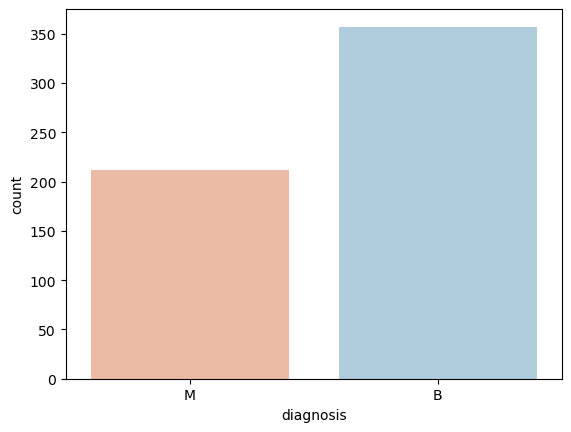

In [8]:
sns.countplot(x='diagnosis', data=df, palette='RdBu', hue='diagnosis', legend=False)

It looks like some columns have a similar name, we will check one of them out, which is **radius_mean, perimeter_mean, and area_mean**.

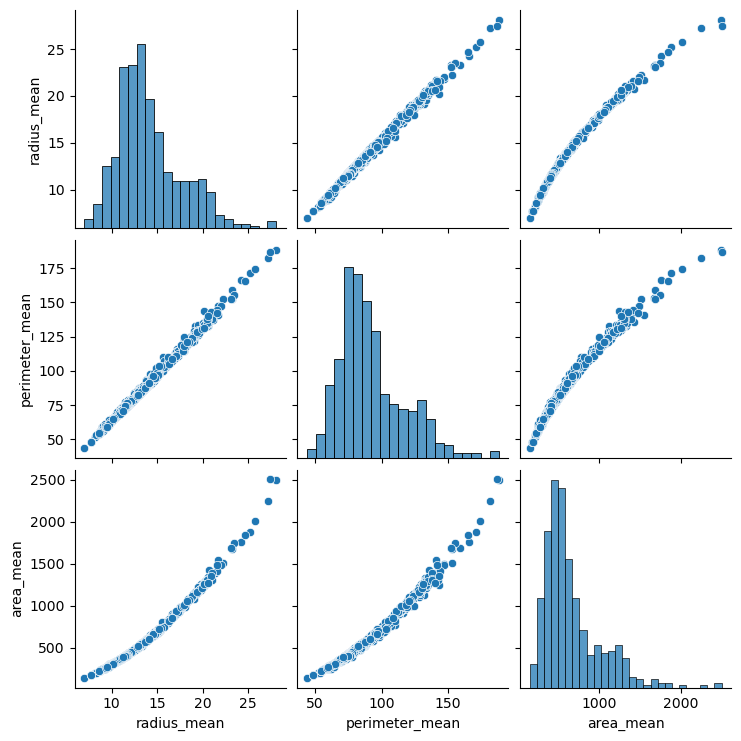

In [9]:
sns.pairplot(df[['radius_mean', 'perimeter_mean', 'area_mean']])

How about **area_worst, area_se, and area_mean**?

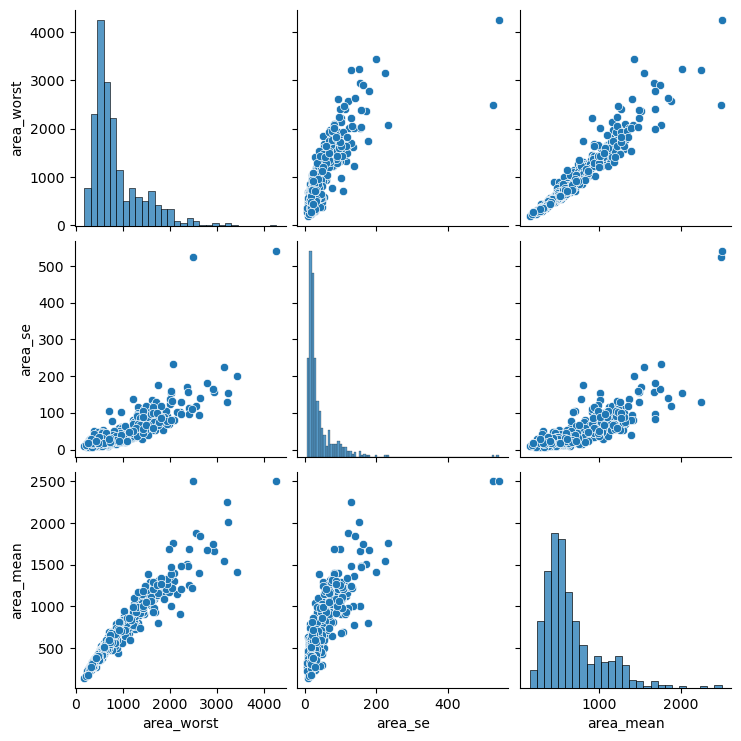

In [10]:
sns.pairplot(df[['area_worst', 'area_se', 'area_mean']])

It looks like data with similar names have a high correlation. Using them might cause '**multicollinearity**'. In order to avoid this, we will need to perform feature selection.

## Feature Selection
If features have correlations **above 0.8**, we will pick one of them and remove the rest in order to avoid '**multicollinearity**'.

We know that columns with similar name have a high correlation, but there might be other columns that are highly correlated aswell.

To check this, we will create a heatmap of the dataset's correlation. The diagnosis column will be removed temporarily since it is our label.

<Axes: >

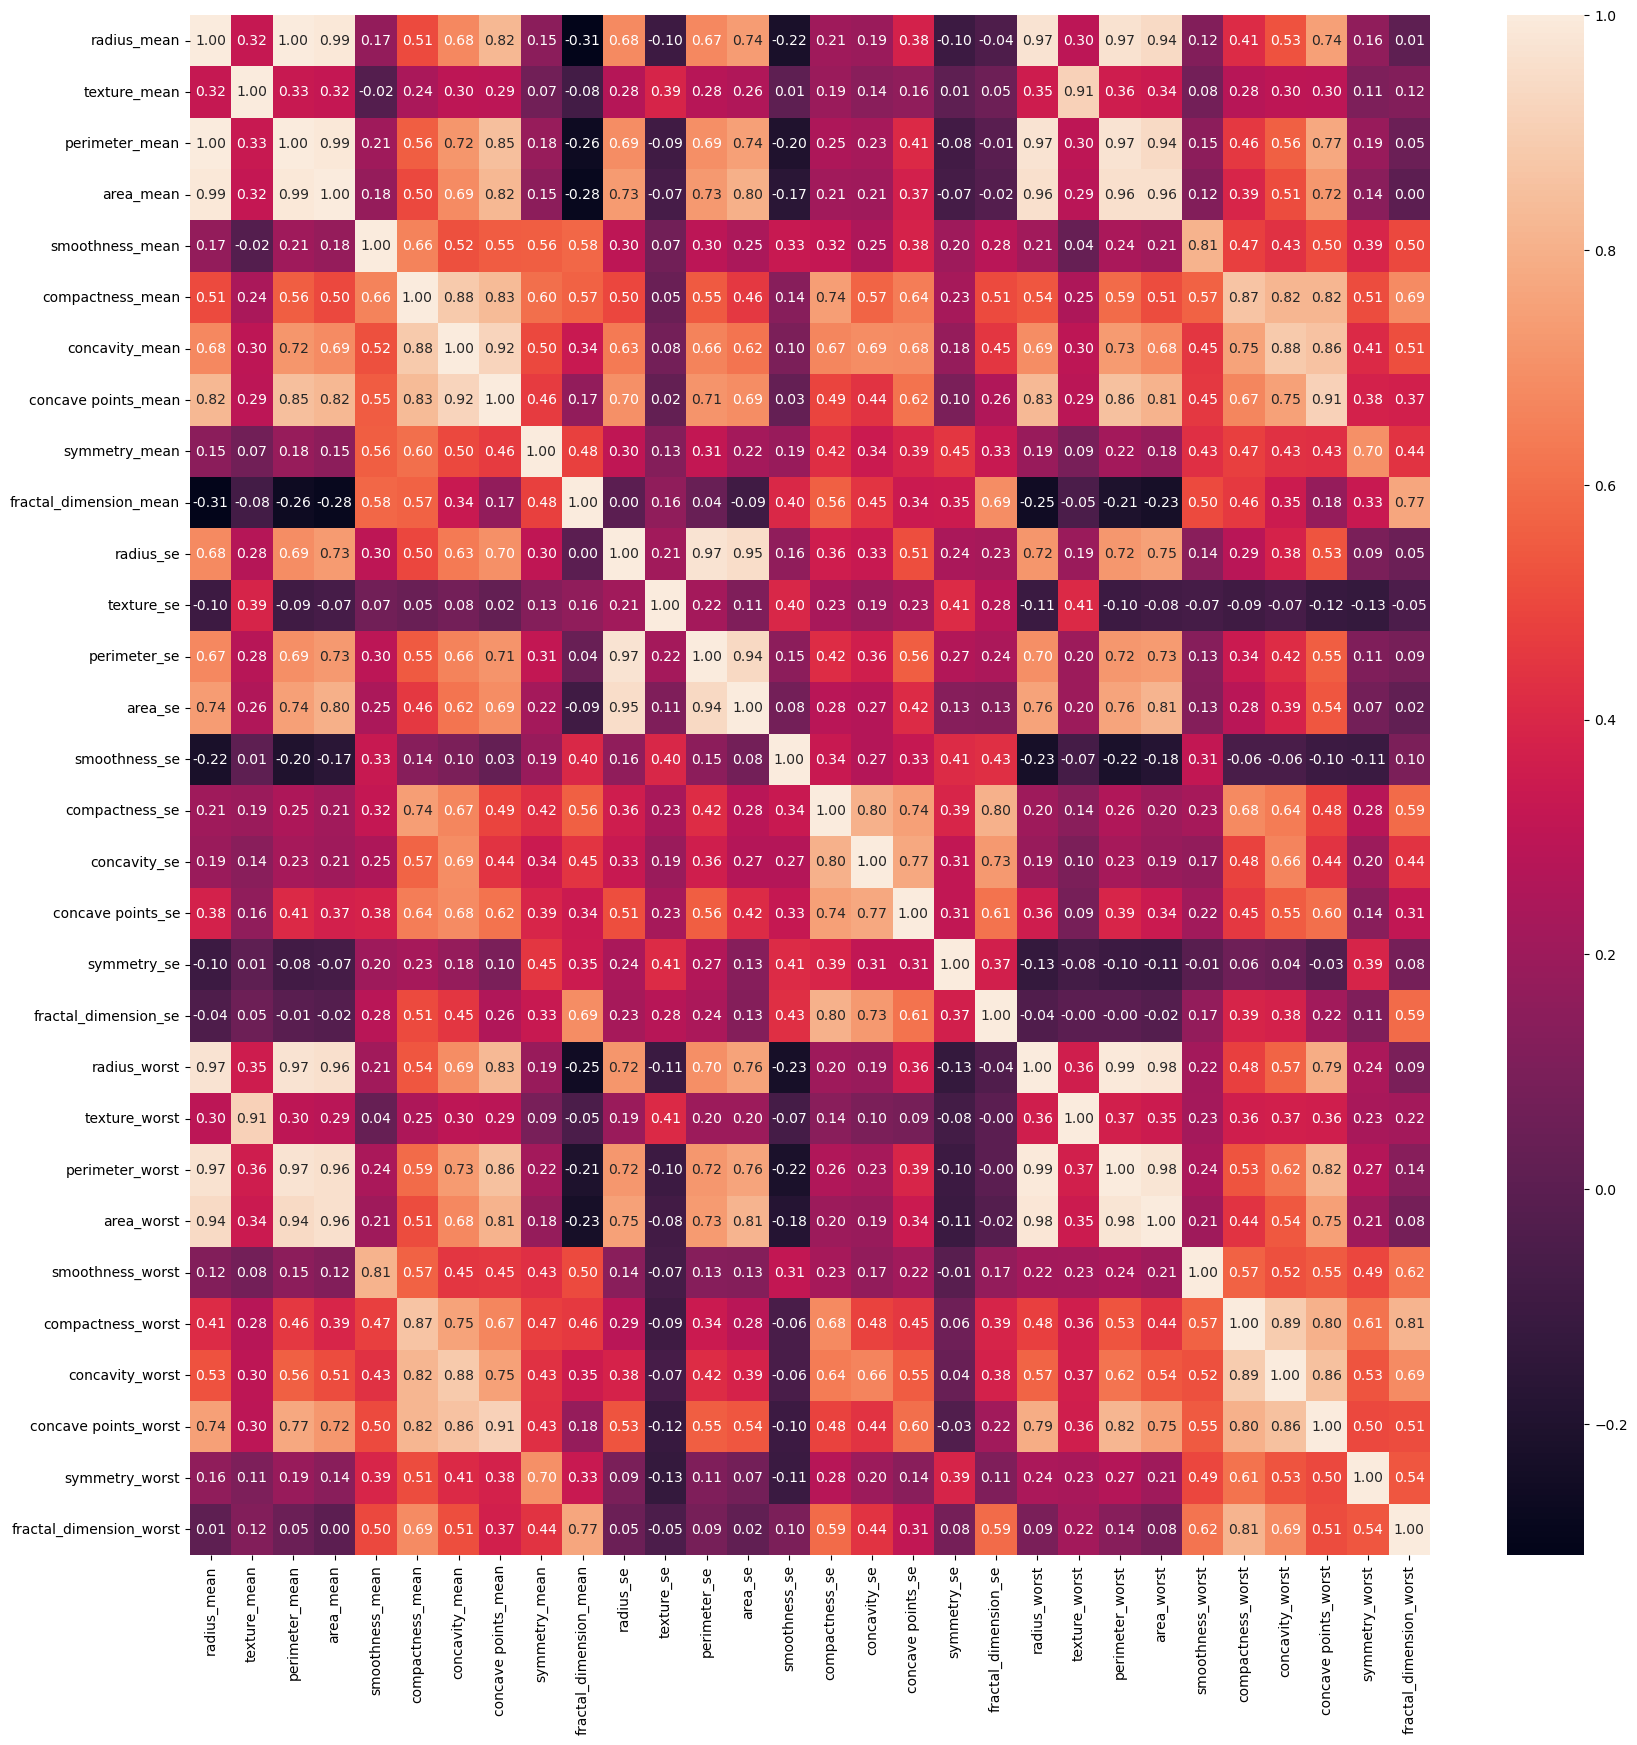

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.drop('diagnosis', axis=1).corr(numeric_only=True), annot=True, fmt='0.2f')

- **radius_mean, perimeter_mean, area_mean** are correlated with each other. We will only choose **area_mean**.
- **compactness_mean, concavity_mean, concave points_mean** are correlated with each other. We will only choose **concavity_mean**.
- **radius_worst, perimeter_worst, area_worst** are correlated with each other. We will only choose **area_worst**.
- **compactness_worst, concavity_worst, concave points_worst** are correlated with each other. We will only choose **concavity_worst**.
- **perimeter_se, area_se, radius_se** are correlated with each other. We will only choose **area_se**.
- **compactness_se, concavity_se, concave points_se** are correlated with each other. We will only choose **concavity_se**.
- **texture_worst, texture_mean** are correlated with each other. We will only choose **texture_mean**.
- **area_worst, area_mean** are correlated with each other. We will only choose **area_mean**.
- **area_se, area_mean** are correlated with each other. We will only choose **area_mean**.
- **concavity_worst, concavity_mean** are correlated with each other. We will only choose **concavity_mean**.
- **smoothness_mean, smoothness_worst** are correlated with each other. We will only choose **smoothness_mean**.

In [12]:
drop_list = [
    'radius_mean', 'perimeter_mean', 
    'compactness_mean', 'concave points_mean', 
    'radius_worst', 'perimeter_worst',
    'compactness_worst', 'concave points_worst',
    'perimeter_se', 'radius_se',
    'compactness_se', 'concave points_se',
    'texture_worst',
    'area_worst',
    'area_se',
    'concavity_worst',
    'smoothness_worst'
    ]
df.drop(drop_list, axis=1, inplace=True)

<Axes: >

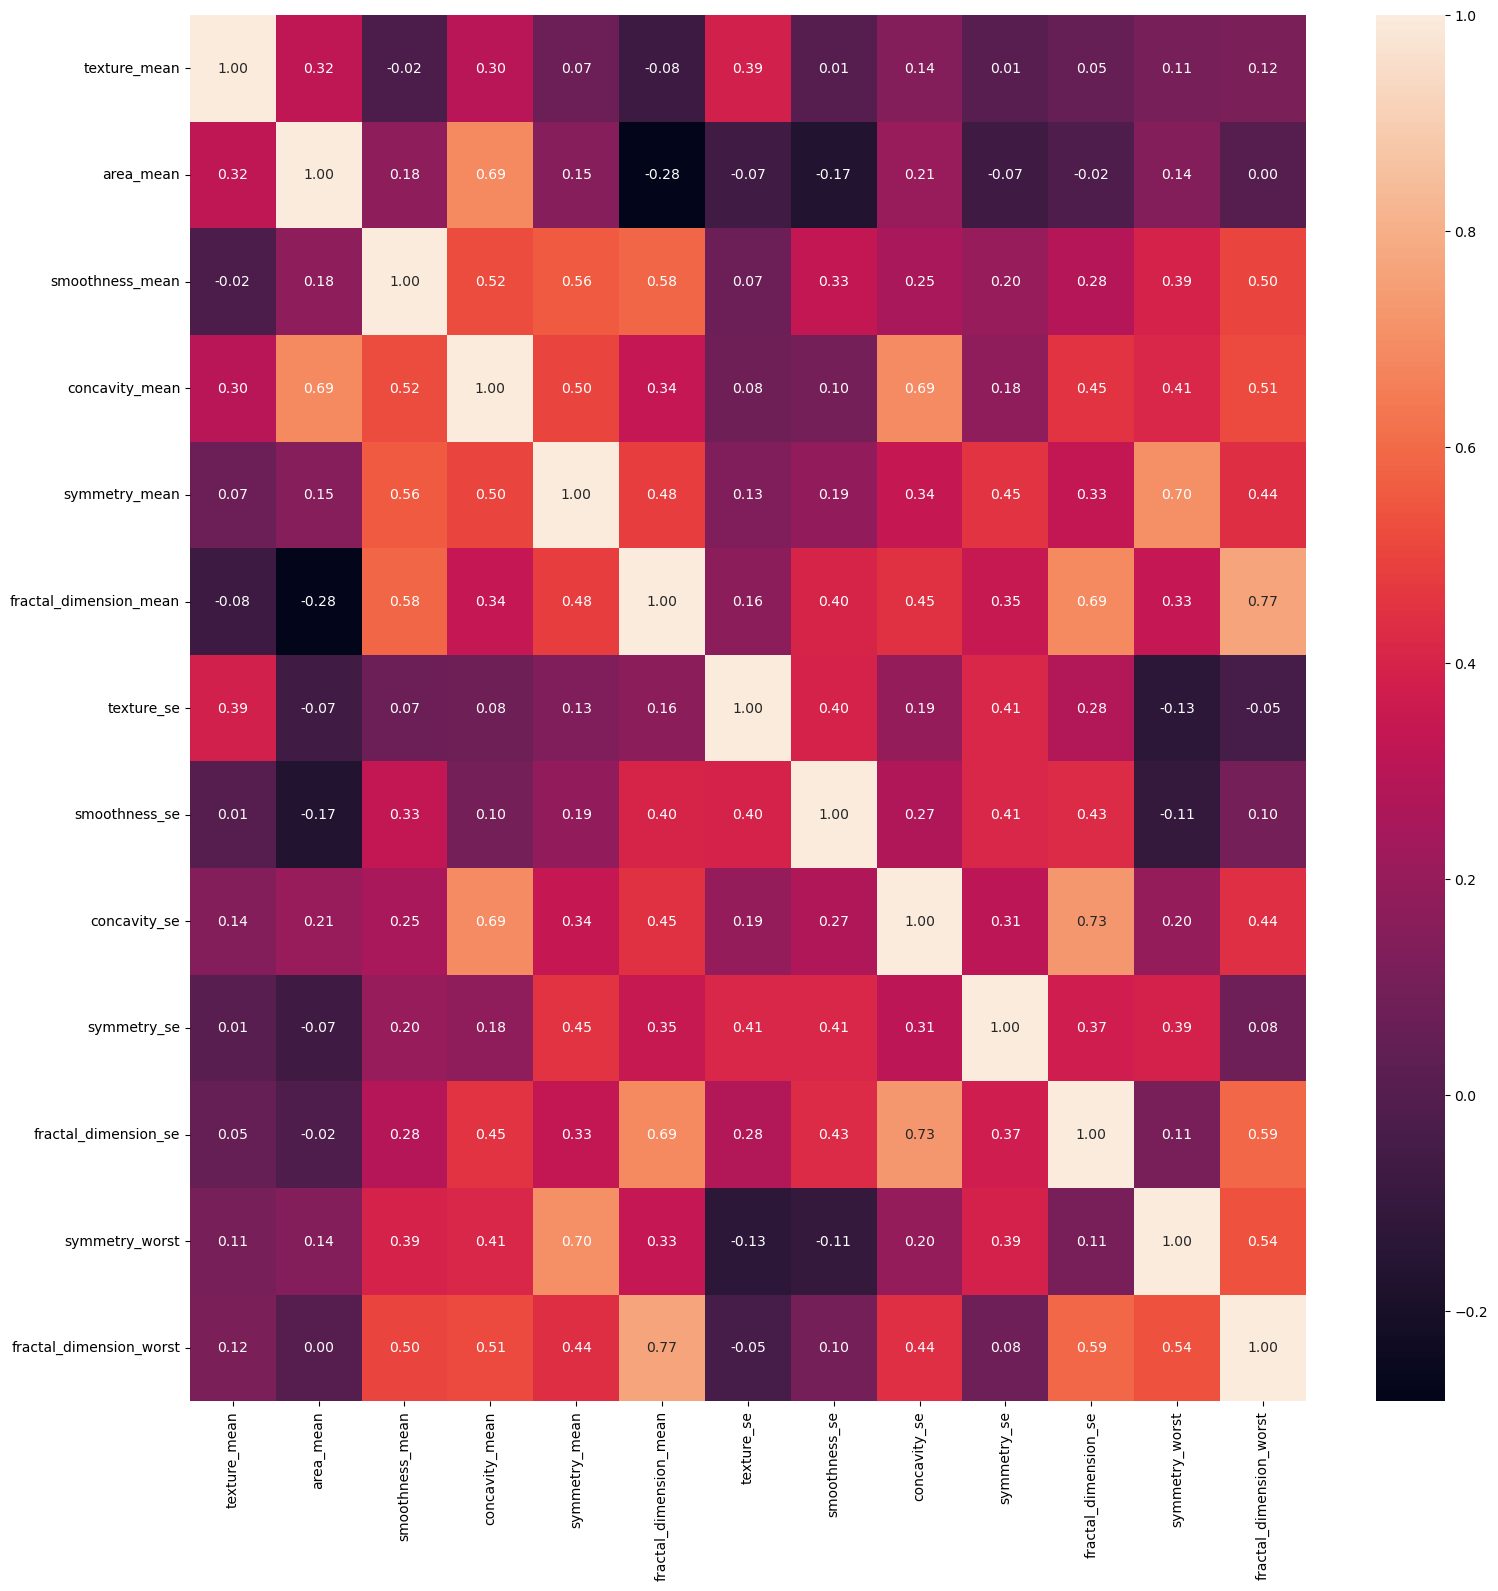

In [13]:
plt.figure(figsize=(18,18))
sns.heatmap(df.drop('diagnosis', axis=1).corr(numeric_only=True), annot=True, fmt='0.2f')

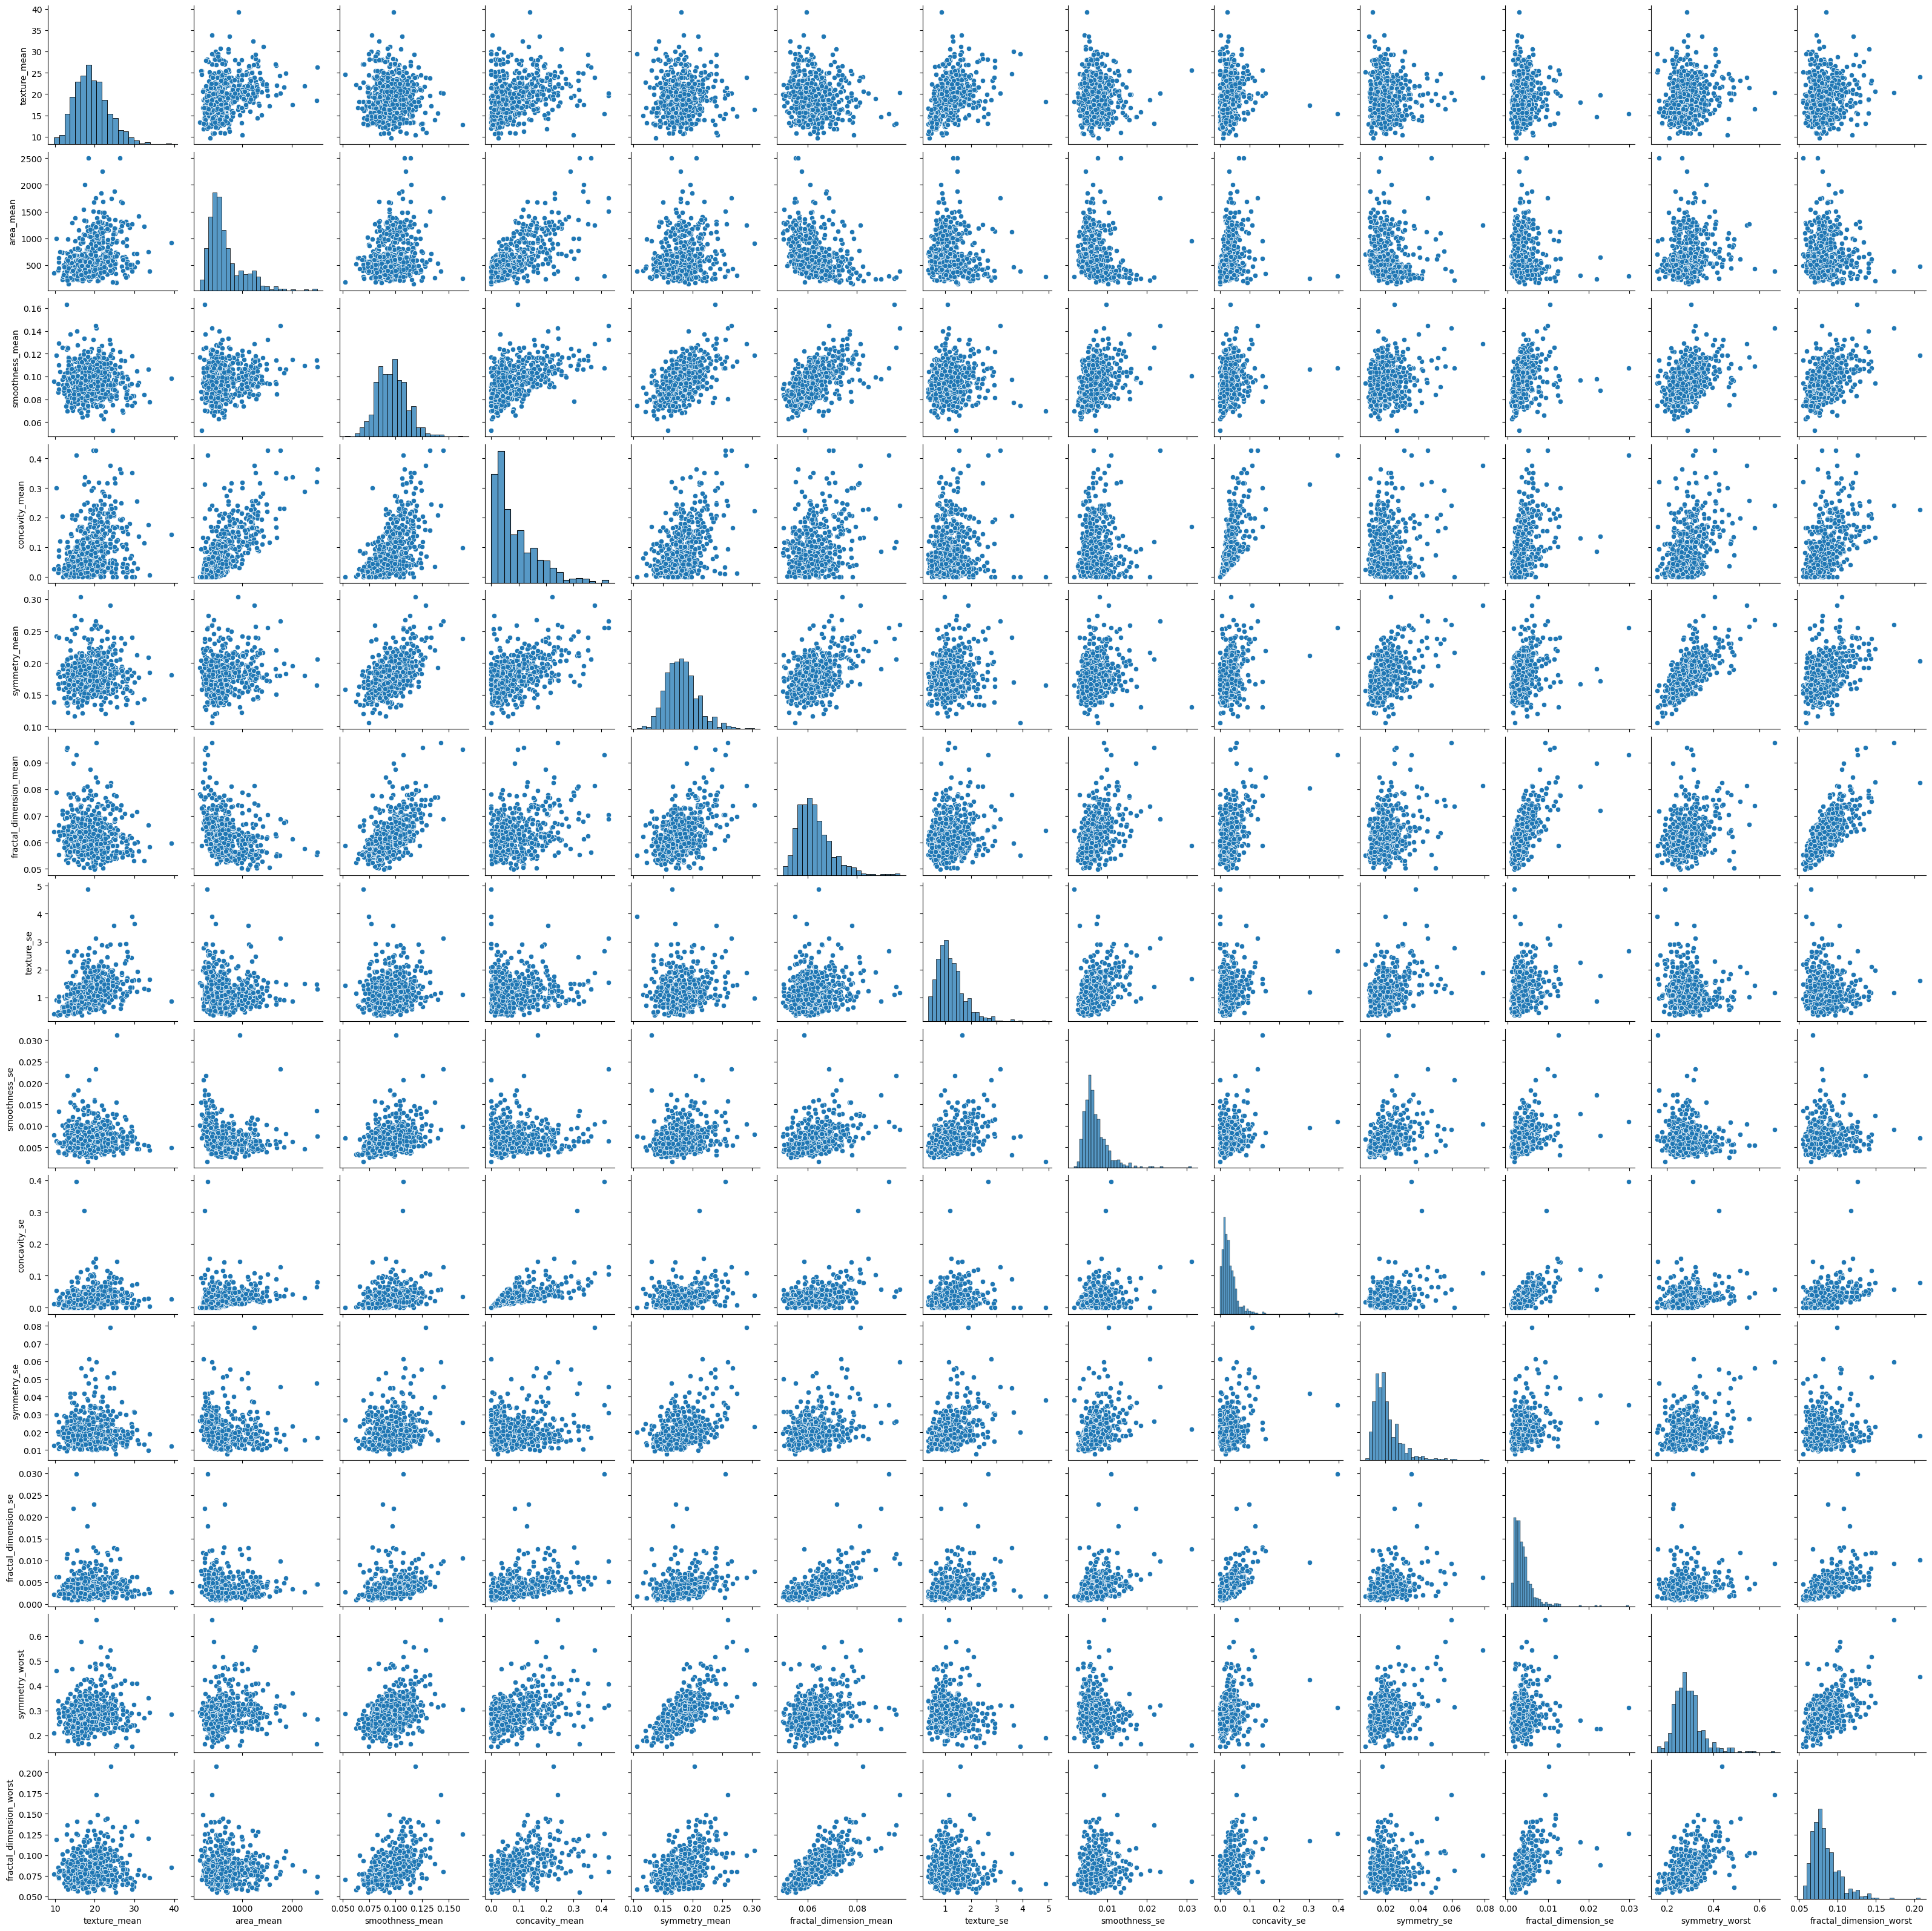

In [14]:
sns.pairplot(df)

We will perform '**binary encoding**' on the diagnosis column, replacing the categories 'B' and 'M' with numerical values 0 and 1 respectively.

In [15]:
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

In [16]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## Standardize the Data

Since KNN calculate distance between data points, we will now standardize the data.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(df.drop('diagnosis', axis=1))

StandardScaler()

In [20]:
scaled_features = scaler.transform(df.drop('diagnosis', axis=1))

In [21]:
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[1:])

In [22]:
df_scaled.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,-2.073335,0.984375,1.568466,2.652874,2.217515,2.255747,-0.565265,-0.214002,0.724026,1.148757,0.907083,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.023846,0.001392,-0.868652,-0.876244,-0.605351,-0.440780,-0.805450,-0.099444,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.363478,0.939685,-0.398008,-0.780083,-0.297005,0.213076,0.237036,0.293559,1.152255,0.201391
3,0.253732,-0.764464,3.283553,1.915897,2.867383,4.910919,-0.110409,0.689702,0.819518,4.732680,2.047511,6.046041,4.935010
4,-1.151816,1.826229,0.280372,1.371011,-0.009560,-0.562450,-0.790244,1.483067,0.828471,-0.361092,0.499328,-0.868353,-0.397100


## Creating and training the model

We are going to randomly split the data into training and testing set using train_test_split() method.

70% is kept for training and 30% for testing.

We will start with k = 3, and later we will use the '**elbow method**' to find a better k value.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df_scaled
y = df['diagnosis']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
predictions = knn.predict(X_test)

In [30]:
print(predictions)

[0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1
 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


Remember that **0 or negative represents 'benign'** and **1 or positive represents ' malignant'**.

## Model Evaluation

Let's evaluate our model's performance with k = 3.

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test, predictions))

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
data = {'Actual Negative': [TN, FP], 'Actual Positive': [FN, TP]}
index = ['Predicted Negative', 'Predicted Positive']
confusion_m = pd.DataFrame(data, index=index)
confusion_m

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       108
           1       0.95      0.87      0.91        63

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171



,Actual Negative,Actual Positive
Predicted Negative,105,8
Predicted Positive,3,55


An accuracy of around 0.94 is very good! But let's see if we can somehow improve the accuracy even more by changing the k value.

## Choosing a better k value

We will apply the '**elbow method**' by looping over different k values, ranging from 1 to 40. 

For each k value, we will get the error rate and visualize it on a chart. This will help us find the optimal k value for our dataset.

In [33]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

<Axes: >

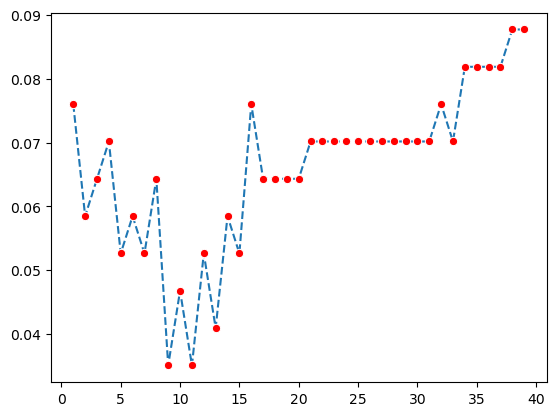

In [34]:
sns.lineplot(x=range(1,40), y=error_rate, linestyle='--', marker='o', markerfacecolor='red')

Based on the lineplot we can see that higher k values (above 15) perform worse.

We should not immediately pick the k value that has the lowest error rate. We should pick around the value that is relatively stable and still produce a low error rate, in this case we might want to pick 7 or 15.

Higher k values have a risk of overfitting and makes the algorithm to run longer. We will pick 7, although in this case 15 might actually still be fine to use.

In [38]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

In [39]:
print(classification_report(y_test, predictions))
TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()
data = {'Actual Negative': [TN, FP], 'Actual Positive': [FN, TP]}
index = ['Predicted Negative', 'Predicted Positive']
confusion_m = pd.DataFrame(data, index=index)
confusion_m

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       108
           1       0.98      0.87      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



,Actual Negative,Actual Positive
Predicted Negative,107,8
Predicted Positive,1,55


In [42]:
print('3 Neighbours : ', 1 - error_rate[2])
print('7 Neighbours : ', 1 - error_rate[6])

3 Neighbours :  0.935672514619883
7 Neighbours :  0.9473684210526316


By changing the k value from 3 to 7, we manage to improve the accuracy by around 0.012.